# Coursework 2 - Mathematics for Machine Learning

## Due: 12/12/2025

## CID: 02232170

***
***

## Exercise 1: Approximation theory

### Exercise 1.1

#### Question 1:

$$ f(x) = A_2\sigma(A_1x + b_1)$$
Noting some important details: $x$ is of size d and non-negative ($ \in [0,1]^d$) and the width of each layer is required to be $d+3$.  We want $w$ ReLU layers which is the same number of rows as $A_1$ and columns as $A_2$. We will rename A1 to $A^{(1)}$  A2 to $A^{(2)}$ and b1 as $b^{(1)}$ to denote the layer they belong to and reference their rows and columns easily.
$$
   [\sigma(A^{(1)}x + b^{(1)})]_i = \sigma(\sum_{j = 1}^d A_{i, j}^{(1)}x + b_i^{(1)}) \tag{ ith element after activation}
$$
We can rewrite f as: $\sum_{i = 1}^w A_i^{(2)}[\sigma(A^{(1)}x + b^{(1)})]_i$.

<br> The new network we will construct will separate each of the rows of $A^{(1)}$ into w hidden layers, and use $ReLU$ as the activation function. what we need to do <br>
1. Preserve x across all layers(of width d) so that we can apply each row of $A^{(1)}$ independently <br>
2. compute $sigma(A^{(1)}x + b^{(1)})$ across w hidden and ReLU layers (of width 1) <br>
3. store the sum of positive and negative values from previous layers (of width 1 each). We do this because $ReLU$ will be applied on our new layers and only outputs non-negative values, so we need to keep track of positive and negative contributions separately. Note that $x \in [0,1]^d$ so we dont need to worry about $ReLU$ erasing any values from x. <br>
4. The final layer will subtract the negative sum from the positive sum. <br>
Dimensionally, we have d+3 nodes per layer, which meets the requirement. <br>

Let's define the layers: <br>
- $W^{(1)}$ : First layer weights of size (d+3) x d 
$$
   W^{(1)} = \begin{bmatrix}
   I \\
   A_1^{(1)} \\
    \bold{0} \\
    \bold{0} 
   \end{bmatrix}
$$
Where I is the identity matrix of size d x d,  $\bold{0}$ are zero vectors of size 1 x d, $A_1^{(1)}$ is the first row of $A^{(1)}$. <br> We will denote our new bias vector as $c^{(i)}$ for layer i. 
$$
c^{(1)} = \begin{bmatrix}
   \bold{0} \\
   b_1^{(1)} \\
    0 \\
    0 
\end{bmatrix}
$$
Thus post-activation we have the following calculations:
$$
\sigma(W^{(1)}x + c^{(1)}) = \begin{bmatrix}
   x \\
   \sigma(A_1^{(1)}x + b_1^{(1)}) \\
    0 \\
    0
\end{bmatrix}
$$
- For layer 2 to w we get the following input, Weight and bias: <br>
$$

    W^{(i)} = \begin{bmatrix}
    I & 0 & 0 & 0\\
    A_i^{(1)} & 0 & 0 & 0 \\
    \bold{0} & \sigma(A_{i-1}^{(2)}) & 1 & 0 \\
    \bold{0} & \sigma(-A_{i-1}^{(2)}) & 0 & 1
    \end{bmatrix}
$$
$$
x' = \begin{bmatrix}
    x \\
    \sigma(A_{i-1}^{(1)}x + b_{i-1}^{(1)}) \\
    \text{Sum of positive contributions from previous layers} \\
    \text{Sum of negative contributions from previous layers}
    \end{bmatrix}
    \;
c^{(i)} = \begin{bmatrix}
    \bold{0} \\
    b_i^{(1)} \\
    0 \\
    0 
    \end{bmatrix}
$$ 
Note that in all our $c^{(i)}$ vectors, $\bold{0}$ is a zero vector of size d x 1. <br>
Explanation of the weight matrix: <br>
- First d rows preserve x  due to Identity matrix<br>
- (d+1)th row computes $A_i^{(1)}x + b_i^{(1)}$ <br>
- (d+2)th row adds the positive contribution from this layer(if any) to the sum of positive contributions from previous layers <br>
- (d+3)th row adds the negative contribution from this layer(if any) to the sum of negative contributions from previous layers <br> 
I have used $\sigma(A_{i-1}^{(2)})$ to denote whether the output from the previous layer was positive or negative, which determines whether we add to the positive or negative sum. But, if we were to construct it in reality, we would put a zero on row d+2 if $A_{i-1}^{(2)}$ is negative itself otherwise. Likewise for row d+3. This makes it so that the negative and positive contributions are stored as positive values and 0 is added to the layers. We have $I_2$ in the bottom right of W^(i) so that we sum the previously gained contributions to the new contribution. <br><br>

To make it more clear we will write the output of 1 layer depending on the sign of $A_{i-1}^{(2)}$: <br>

If $A_{i-1}^{(2)}$ is positive: <br>
$$
    \implies \begin{bmatrix}
    x \\
    \sigma(A_{i-1}^{(1)}x + b_{i-1}^{(1)}) \\
    \text{Sum of positive contributions from previous layers} + \sigma(A_{i-1}^{(1)}x + b_{i-1}^{(1)}) \\
    \text{Sum of negative contributions from previous layers}
    \end{bmatrix}
$$
If $A_{i-1}^{(2)}$ is negative: <br>
$$
    \implies \begin{bmatrix}
    x \\
    \sigma(A_{i-1}^{(1)}x + b_{i-1}^{(1)}) \\
    \text{Sum of positive contributions from previous layers} \\
    \text{Sum of negative contributions from previous layers} + \sigma(A_{i-1}^{(1)}x + b_{i-1}^{(1)})
    \end{bmatrix}
$$

- Finally for the output layer we have: <br>
$$
    W^{output} = \begin{bmatrix} 0_{1 \times d} & A^{(2)}_w & -1 & 1 \end{bmatrix}
$$
such that when applying to the output of the wth hidden layer we get the calculation:
$$
\begin{bmatrix} 0_{1 \times d} & A^{(2)}_w & -1 & 1 \end{bmatrix} \times
\begin{bmatrix} x \\ \sigma(A_{w}^{(1)}x + b_{w}^{(1)}) \\ 
\sum_{j=1}^{w-1} \sigma(A_{j}^{(1)}x + b_{j}^{(1)})\mathbb{1}_{A_{j}^{(2)}>0} \\
\sum_{j=1}^{w-1} \sigma(A_{j}^{(1)}x + b_{j}^{(1)})\mathbb{1}_{A_{j}^{(2)}<0}
\end{bmatrix} \\


 = A^{(2)}_w \sigma(A_{w}^{(1)}x + b_{w}^{(1)}) + 
 \sum_{j=1}^{w-1} \sigma(A_{j}^{(1)}x + b_{j}^{(1)})\mathbb{1}_{A_{j}^{(2)}>0} 
 - \sum_{j=1}^{w-1} \sigma(A_{j}^{(1)}x + b_{j}^{(1)})\mathbb{1}_{A_{j}^{(2)}<0} 
 = A^{(2)}_w \sigma(A_{w}^{(1)}x + b_{w}^{(1)}) + 
 \sum_{j=1}^{w-1} A_{j}^{(2)} \sigma(A_{j}^{(1)}x + b_{j}^{(1)})  \\
 = \sum_{i = 1}^w A_i^{(2)}[\sigma(A^{(1)}x + b^{(1)})]_i = f(x)
$$
Therefore, we define $N(x)$ as the following:
$$
N(x) = W^{output} \sigma(W^{(w)} \sigma(W^{(w-1)} ... \sigma(W^{(1)}x + c^{(1)}) ... + c^{(w-1)}) + c^{(w)}) 
$$ 
and have proved that $$ N(x) = f(x) \; \forall x \in [0,1]^d$$


#### Question 2:

Enter your answer here
In our previous answer, we assumed that $ x \in [0,1]^d$. However, if we relax this assumption and allow $x$ to be in $[-1,1]^d$. One way to handle this is to introduce d extra rows in W and c, $W \in R^{(2d + 3)\times d}$ and $c \in R^{2d + 3}$. We will use it to store $ -x$ alongside x in the first layer.
Our new Matrices and vectors will look like this:
$$
    W^{(1)} = \begin{bmatrix}
    I \\
    -I \\
    A_1^{(1)} \\
     \bold{0} \\
     \bold{0} 
    \end{bmatrix}
$$
where, I is the identity matrix of size d x d,  $\bold{0}$ are zero vectors of size 1 x d, $A_1^{(1)}$ is the first row of $A^{(1)}$. <br> We will denote our new bias vector as $c^{(i)}$ for layer i.
$$
c^{(1)} = \begin{bmatrix}
    \bold{0} \\
    \bold{0} \\
    b_1^{(1)} \\
     0 \\
     0 
\end{bmatrix}
$$
Where $\bold{0}$ is a zero vector of size d x 1. <br>
For $i >1$ we have:
$$
    W^{(i)} = \begin{bmatrix}
    I & \bold{0} & 0 & 0 & 0\\
    \bold{0} & -I & 0 & 0 & 0\\
    A_i^{(1)} & -A_i^{(1)} & 0 & 0 & 0 \\
    \bold{0} & \bold{0} & \sigma(A_{i-1}^{(2)}) & 1 & 0 \\
    \bold{0} & \bold{0} & \sigma(-A_{i-1}^{(2)}) & 0 & 1
    \end{bmatrix}
$$

Finally for the output layer we have: <br>
$$ 
    W^{output} = \begin{bmatrix} 0_{1 \times d} & 0_{1 \times d} & A^{(2)}_w & 1 & -1 \end{bmatrix}
$$
Example Output of hidden layer:
$$
\begin{bmatrix}
    \sigma(x) \\
    \sigma(-x) \\
    \sigma(A_{i-1}^{(1)}x + b_{i-1}^{(1)}) \\
    \sum \sigma(A^{(1)}_j x + b_j^{(1)}) * 1_{A_j^{(2)}>0} \\
    \sum \sigma(A^{(1)}_j x + b_j^{(1)}) * 1_{A_j^{(2)}<0}
\end{bmatrix}
$$

***
### Exercise 1.2

#### Question 1:

We can begin by using the hint.
$$
h(x) = \lim_{\delta \to 0} \frac{f((w+\delta)x) - f(wx)}{\delta}
$$
Let's define $g_\delta(x) = \frac{f((w+\delta)x) - f(wx)}{\delta}$ which is $\in \mathcal{F}_{\sigma, 1} $ since $\mathcal{F}_{\sigma, 1}$ is closed under addition and scalar multiplication from the question.
Using the Taylor expansion of $f$ about $wx$ we have:
$$
f((w+\delta)x) = f(wx) + \delta x f'(wx) + \frac{\delta^2 x^2}{2} f''(z)
$$
for some $z$ between $wx$ and $(w+\delta)x$. Thus we have:
$$
g_\delta(x) = \frac{f((w+\delta)x) - f(wx)}{\delta} \\ =  \frac{f(wx) + \delta x f'(wx) + \frac{\delta^2 x^2}{2} f''(z) - f(wx)}{\delta} \\ =  x f'(wx) + \frac{\delta x^2}{2} f''(z) = h(sx) + \frac{\delta x^2}{2} f''(z)
$$

So,
$$
|| h - g_\delta ||_u = \sup_{x \in [0,1]} |h(x) - g_\delta(x)| \\
= \sup_{x \in [0,1]} | \frac{\delta x^2}{2} f''(z) | \leq \frac{\delta}{2} \sup_{x \in [0,1]} |z^2 f''(z)| \\
\leq \frac{\delta}{2} \sup_{x \in [0,1]} | f''(z)|
$$
I used that $x \in [0,1]$. We know that $z \in [wx, (w + \delta)x]$ and consider 2 cases of w: w >= 0 means that $z in [0, w + \delta]$ else if w < 0 then $z \in [w, 0]$ which means $|z| \leq |w| + \delta$. 

let's work out the second derivative of f and plug it into our current bound:
$$
f(x) = \sum_{i=1}^m a_i \sigma(W_i x + b_i) \\
f'(x) = \sum_{i=1}^m a_i W_i \sigma'(W_i x + b_i) \\
f''(x) = \sum_{i=1}^m a_i W_i^2 \sigma''(W_i x + b_i) \\
\implies || h - g_\delta ||_u  \leq \frac{\delta}{2} \sup_{|z| \leq |w| + \delta} | f''(z)| = \frac{\delta}{2} \sup_{|z| \leq |w| + \delta} | \sum_{i=1}^m a_i W_i^2 \sigma''(W_i z + b_i) | \\
\leq \frac{\delta}{2}  \sum_{i=1}^m |a_i| *W_i^2 * |\sup_{|z| \leq |w| + \delta} \sigma''(W_i z + b_i) |
$$
Where we use the fact that the supremum of a sum is less than the sum of supremums. Now we can use the fact that 
$ \sigma \in C^\infty \implies \sup_{|z| \leq |w| + \delta} \sigma''(W_i z + b_i) < M_i $ with which we define $M = \sum_{i = 1}^m W_i^2 |a_i| M_i$ <br>

Thus we have:
$$
    || h - g_\delta ||_u  \leq \frac{\delta}{2}  \sum_{i=1}^m |a_i| *W_i^2 * M_i \leq \frac{\delta}{2} M
$$

To conclude, given any $\epsilon > 0, \exists g_\delta \in \mathcal{F}_{\sigma, 1} $ such that $|| h - g_\delta ||_u < \epsilon$ by choosing $\delta = \frac{2 \epsilon}{M}$.

#### Question 2:

Suppose we have $w, b, \epsilon$ as defined in the question, then the base case(n=1) is satisfied from question 1 since we have shown that $h_{1,w,b}(x) = \frac{d}{dw}  f(wx) $ has a g as previously shown. <br>

Assume that for some k>=1, $\exists g_{k,w,b,\epsilon} \in \mathcal{F}_{\sigma, 1} $ such that $ \| h_{k, w, b} - g_{k, w, b, \epsilon} \|_u < \epsilon $ <br>

Now, lets consider the case for k + 1:

$$
\begin{align*}
h_{k+1, w, b}(x) &= \frac{d}{dw} (x^k \sigma^{(k)}(wx + b)) \\
&= \lim_{\delta \rightarrow 0} \frac{x^k \sigma^{(k)}((w + \delta)x + b) - x^k \sigma^{(k)}(wx + b)}{\delta} \\
&= \lim_{\delta \rightarrow 0} \frac{1}{\delta} ( h_{k, w+\delta,b}(x) - h_{k, w,b}(x) )
\end{align*}
$$

I claim that we can choose $g_{k+1, w, b, \epsilon} = \frac{1}{\delta}( g_{k, w + \delta, b, \frac{\epsilon\delta}{4}} - g_{k, w, b, \frac{\epsilon\delta}{4}} ) $. From our inductive hypothesis we have, we chose the functions above such that 
$\| h_{k, w + \delta, b} - g_{k, w + \delta, b, \frac{\epsilon\delta}{4}} \|_u < \frac{\epsilon\delta}{4}$ and $\| h_{k, w, b} - g_{k, w, b, \epsilon} \|_u < \frac{\epsilon\delta}{4}$. For some $\delta > 0$ to be determined later. Note that $g_{k+1, w, b, \epsilon} \in \mathcal{F}_{\sigma, 1} $ since $\mathcal{F}_{\sigma, 1} $ is closed under addition and scalar multiplication. 

Regarding the bound, we have the following proof:
$$
\begin{align*}
\| h_{k+1, w, b} - g_{k+1, w, b, \epsilon} \|_u &=  || h_{k+1,w,b} - \frac{1}{\delta}( g_{k, w + \delta, b, \frac{\epsilon\delta}{4}} - g_{k, w, b, \frac{\epsilon\delta}{4}} ) || \\
&= || h_{k +1, w,b} - \frac{1}{\delta}(h_{k,w + \delta, b} - h_{k,w,b}) + \frac{1}{\delta}(h_{k,w + \delta, b} - h_{k,w,b}) -  \frac{1}{\delta}( g_{k, w + \delta, b, \frac{\epsilon\delta}{4}} - g_{k, w, b, \frac{\epsilon\delta}{4}}) ||_u \\
&\leq || H_{k+1,w,b} - \frac{1}{\delta}(h_{k,w + \delta, b} - h_{k,w,b}) ||_u 
+ \frac{1}{\delta} || h_{k,w+\delta,b} - g_{k,w+\delta,b,\frac{\epsilon\delta}{4}} ||_u
+ \frac{1}{\delta} || h_{k,w,b} - g_{k,w,b,\frac{\epsilon\delta}{4}} ||_u \\
&< || h_{k+1,w,b} - \frac{1}{\delta}(h_{k,w + \delta, b} - h_{k,w,b}) ||_u + \frac{1}{\delta}\frac{\epsilon\delta}{4} + \frac{1}{\delta}\frac{\epsilon\delta}{4} \\
&= || h_{k+1,w,b} - \frac{1}{\delta}(h_{k,w + \delta, b} - h_{k,w,b}) ||_u + \frac{\epsilon}{2}



\end{align*}
$$
In line 3, I used the triangle inequality. in line 4, I used the bound that we found in part 1 of this question. To bound the first term, we can use the Taylor series expansion again:
$$
\begin{align*}
    \frac{1}{\delta} (h_{k, w+\delta,b} - h_{k, w,b})  &= \frac{1}{\delta} ( x^k \sigma^{(k)}((w + \delta)x + b) - x^k \sigma^{(k)}(wx + b) ) 
\end{align*}
$$
Expanding $\sigma^{(k)}((w + \delta)x + b)$ using Taylor series:
$$
\sigma^{(k)}((w + \delta)x + b) = \sigma^{(k)}(wx + b) + \delta x \sigma^{(k+1)}(wx + b) + \frac{\delta^2 x^2}{2} \sigma^{(k+2)}(wz + b)
$$
Substituting this back we have:
$$
\frac{x^k}{\delta} (\sigma^{(k)}(wx + b) + {\sigma^{(k + 1)}(wx + b) \delta x} + {\sigma^{(k + 2)}(wz + b) \frac{(\delta x)^2}{2}}- \sigma^{(k)}(wx + b)) \\
= x^{k+1} \sigma^{(k + 1)}(wx + b) + \frac{\delta x^{k+2}}{2} \sigma^{(k + 2)}(wz + b) = h_{k+1,w,b}(x) + \frac{\delta x^{k+2}}{2} \sigma^{(k + 2)}(wz + b)
$$
And, substituting this back into the bound:
$$
\begin{align*}
&|| h_{k+1,w,b} - \frac{1}{\delta}(h_{k,w + \delta, b} - h_{k,w,b}) ||_u \\
&= || h_{k+1,w,b} - h_{k+1,w,b} - \frac{\delta x^{k+2}}{2} \sigma^{(k + 2)}(wz + b) ||_u   \\ &= || - \frac{\delta x^{k+2}}{2} \sigma^{(k + 2)}(wz + b) ||_u  \\ 
&= \frac{\delta}{2} \sup_{x \in [0,1]} | x^{k+2} \sigma^{(k + 2)}(wz + b) | \leq \frac{\delta}{2} \sup_{x \in [0,1]} | \sigma^{(k + 2)}(wz + b) | \\
&\leq \frac{\delta}{2} M_{k+2} < \frac{\epsilon}{2} \quad \text{lets choose } \delta < min (\frac{\epsilon}{M_{k+2}}, 1)
\end{align*}
$$
I used that $x \in [0,1]$ in line 4, and the fact that $\sigma \in C^\infty$ in line 5 to define $M_{k+2}$ from the definition in the question. <br>
Finally lets put it back into the main bound
$$
\| h_{k+1, w, b} - g_{k+1, w, b, \epsilon} \|_u \leq || h_{k+1,w,b} - \frac{1}{\delta}(h_{k,w + \delta, b} - h_{k,w,b}) ||_u + \frac{\epsilon}{2} < \frac{\epsilon}{2} + \frac{\epsilon}{2} = \epsilon
$$
Thus by induction, we have shown that $\forall n \in \mathbb{N}, \exists g_{n,w,b,\epsilon} \in \mathcal{F}_{\sigma, 1} $ such that $ \| h_{n, w, b} - g_{n, w, b, \epsilon} \|_u < \epsilon $.>


#### Question 3:

From the previous part, we showed that given, $h_{n,w,b}(x) = x^n \sigma^{(n)}(wx + b), \forall \epsilon >0, \exists g_{n,w,b,\epsilon}, ||h_{n,w,b} -  g_{n,w,b,\epsilon}||_u < \epsilon$. If we set w=0, then $h_{n,0,b}(x) = x^n \sigma^{(n)}(b) = p_n(x) \sigma^{(n)}(b)$.
We can define a different function $$g'_{n,0,b,\epsilon} = \frac{g_{n,w,b,\epsilon}}{\sigma^{(n)}(b)}$$. we know that g' is in $\mathcal{F}_{\sigma,1} $ because $\mathcal{F}_{\sigma,1} $ is closed under scalar multiplication.
Now we can compute the bound with $\epsilon' = \epsilon |\sigma^{(n)}(b)|$:
$$
|| p_n - g'_{n,0,b,\epsilon'}||_u = \frac{1}{|\sigma^{(n)}(b)|} || h_{n,0,b} - g_{n,0,b,\epsilon'} ||_u < \frac{\epsilon'}{|\sigma^{(n)}(b)|} = \epsilon
$$
where we used that $h_n,0,b = p_n(x) \sigma^{(n)}(b) $ and $ ||h_{n,0,b} - g_{n,0,b,\epsilon'}||_u < \epsilon'$ from the previous part.

For the proof to be complete we need it to be that for all n, $\sigma^{(n)}(b) \neq 0$ for some b. Now we know that  $\sigma$ is not a polynomial, which means that there cannot be a derivative of $sigma$ that is 0 everywhere. To see this, suppose there is a k such that $\sigma^{(k)}(x) = 0$, then intergrating k times would mean that $\sigma$ is a polynomial of degree at most k-1, which is a contradiction. Thus for all n, there exists some b such that $\sigma^{(n)}(b) \neq 0$. Concluding the proof, we are allowed to divide by $\sigma^{(n)}(b)$ in the earlier steps.

#### Question 4:

Our previous part used that x is in [0,1], we would like to extends this to [-r,r] for any r > 0. Suppose we define $y = 2rx - r$ then $x \in [0,1] \iff y \in [-r,r]$.
Then p_n(y) can be written as:
$$
(2rx -r)^n = \sum_{k=0}^n \binom{n}{k} (2rx)^k (-r)^{n-k} = \sum_{k=0}^n \binom{n}{k} (2r)^k (-r)^{n-k} x^k \\ = \sum_{k=0}^n \binom{n}{k} (2r)^k (-r)^{n-k} p_k(x) =  \sum_{k=0}^n c_k p_k(x)
$$
where $c_k = \binom{n}{k} (2r)^k (-r)^{n-k}$. From part 3, we know that p_k(x) has an approximation in $\mathcal{F}_{\sigma,1}$ and we can call it $a_{k,\delta}$. Let's define a function $$A_n(y) = \sum_{k=0}^n c_k a_{k,\delta}(\frac{y +r}{2r}) = \sum_{k=0}^n c_k a_{k,\delta}(x)$$
That uses the approximations of $p_k(x)$ and the coefficients from $p_n(y). Note that $A_n(y) \in \mathcal{F}_{\sigma,1}$ since it is a linear combination of functions in $\mathcal{F}_{\sigma,1}$. Let's fix $\epsilon>0 $ and choose $\delta= \frac{\epsilon}{\sum_{k=0}^n |c_k|}$ then we have the following bound:
$$
|| p_n(y) - A_n(y) ||_u = || \sum_{k=0}^n c_k p_k(x) - \sum_{k=0}^n c_k a_{k,\delta}(x) ||_u = || \sum_{k=0}^n c_k (p_k(x) - a_{k,\delta}(x)) ||_u \\
\leq \sum_{k=0}^n |c_k| || p_k(x) - a_{k,\delta}(x) ||_u < \sum_{k=0}^n |c_k| \delta = \epsilon
$$
Where I used the triangle inequality in line 3. Thus we have shown that we can find an approximation for $p_n(y)$ on the interval [-r,r] using functions from $\mathcal{F}_{\sigma,1}$.
<br>
Coming back to the question, we want to find an approximation for exp(x) on the interval [-r,r] and can do so using the Taylor series:
$$
exp(x) = \sum_{k=0}^\infty \frac{x^k}{k!} = \sum_{k=0}^n \frac{x^k}{k!} + R_n(x) \\
R_n(x) = \frac{exp(z) x^{n+1}}{(n+1)!} \text{ for some z between 0 and x}
$$

So we know that $p_k(x) = x^k$ has an approximation in $\mathcal{F}_{\sigma,1}$ and will call it $a_{k,\delta}$ and set $\delta = \frac{\epsilon}{2 \sum_{k=0}^n \frac{1}{k!}}$. Let's define a new function E and show that it approximates exp(x).
$$
E_n(x) = \sum_{k=0}^n \frac{a_{k,\delta}(x)}{k!}
$$

Now lets bound the error:

$$
\begin{align*}
\sup_{|x| \leq r} | exp(x) - E_n(x) | &= \sup_{|x| \leq r} | \sum_{k=0}^n \frac{x^k}{k!} + R_n(x) - \sum_{k=0}^n \frac{a_{k,\delta}(x)}{k!} | \\
&= \sup_{|x| \leq r} | R_n(x) + \sum_{k=0}^n \frac{x^k - a_{k,\delta}(x)}{k!} | \\
&\leq \sup_{|x| \leq r} | R_n(x) | + \sup_{|x| \leq r} | \sum_{k=0}^n \frac{x^k - a_{k,\delta}(x)}{k!} | \\
&\leq \sup_{|x| \leq r} | R_n(x) | + \sum_{k=0}^n \frac{1}{k!} \sup_{|x| \leq r} | x^k - a_{k,\delta}(x) | \\
&< \sup_{|x| \leq r} |R_n(x)| + \sum_{k=0} \frac{1}{k!} \delta = \sup_{|x| \leq r} |R_n(x)| + \frac{\epsilon}{2}

\end{align*}
$$
Here I used the triangle inequality in line 3 and the fact that supremum of a sum is less than the sum of supremums in line 4. <br>
Now we can bound the two terms separately.
$R_n(x) = \frac{exp(z) x^{n+1}}{(n+1)!} \rightarrow 0$ as $n \rightarrow \infty$. Hence, for sufficiently large n, $R_n(x) < \frac{\epsilon}{2}$. <br>

Finally, we have:
$$
\sup_{|x| \leq r} | exp(x) - E_n(x) | < \frac{\epsilon}{2} + \sum_{k=0}^n \frac{1}{k!} \delta = \frac{\epsilon}{2} + \frac{\epsilon}{2} = \epsilon
$$

#### Question 5:

The hint that $\mathcal{F}_{\exp,d}$  is a universeal approximator means that for all $\epsilon>0$ there is a function $E_{\epsilon} \in \mathcal{F}_{\exp,d}$ such that $ ||f - E_{\epsilon} ||_u < \epsilon$, for all $f \in C([0,1]^d)$. From the definition of universal proximator, we know that for some $m, W, a, b$ we can write:
$$
E_{\epsilon}(x) = \sum_{i=1}^m a_i exp(W_i x + b_i)
$$ 
where $W_i$ is the ith row of W. and $a_i, b_i \in \mathbb{R}$ are elements of a and b. <br>

from part 4, we know that each of exp(W_i x + b_i) can be approximated by some function $G_{i,\delta}$ so that $\sup_{y_i = W_i x + b_i \in [-r,r]} | exp(W_i x + b_i) - G_{i,\delta} | < \delta$ for some $\delta >0$ to be determined later. we can set r = \max_{i} |b_i| + sup_{x \in [0,1]^d} |W_i x| to make sure that $y_i$ is in the interval [-r,r]. <br>
Now we can define a new function $$G_{\delta}(x) = \sum_{i=1}^m a_i G_{i,\delta}(x) $$ which is in $\mathcal{F}_{\sigma,d}$ since it is a linear combination of functions in $\mathcal{F}_{\sigma,d}$. <br>
We show this below by subbing in the definition of $G_{i,\delta}$.

$$
G_{\delta}(x) = \sum_{i=1}^m a_i G_{i,\delta}(W_i x + b_i) = \sum_{i=1}^m a_i ( \sum_{j=1}^{k_i} \alpha_{i,j} \sigma( W_{i,j} x + b_{i,j} ) )
$$
Thus we have shown that $G_{\delta}(x) \in \mathcal{F}_{\sigma,d}$.
<br>
Lets bound the error with $\delta = \frac{\epsilon}{\sum_{i=1}^m |a_i|}$:
$$
\begin{align*}
|| f - G_{\delta} ||_u &= || f - E_{\epsilon} + E_{\epsilon} - G_{\delta} ||_u \\
&\leq || f - E_{\epsilon} ||_u + || E_{\epsilon} - G_{\delta} ||_u \\
&< \epsilon + || \sum_{i=1}^m a_i exp(W_i x + b_i) - \sum_{i=1}^m a_i G_{i,\delta}(W_i x + b_i) ||_u \\
&\leq \epsilon + \sum_{i=1}^m |a_i| || exp(W_i x + b_i) - G_{i,\delta}(W_i x + b_i) ||_u \\
\end{align*}
$$
Here I used the triangle inequality in line to and the fact that the supremum of a sum is less than the sum of supremums in line 4. <br>
we know that $||\exp(W_i x + b_i) - G_{i,\delta}(W_i x + b_i) ||_u \implies \sup_{y_i = W_i x + b_i \in [-r,r]} | exp(W_i x + b_i) - G_{i,\delta} | < \delta$ from earlier. Thus we have:
$$
|| f - G_{\delta} ||_u < \epsilon + \sum_{i=1}^m |a_i| \delta = \epsilon + \sum_{i=1}^m |a_i| \frac{\epsilon}{\sum_{i=1}^m |a_i|} = \epsilon + \epsilon = 2 \epsilon
$$
Epsilon is arbitrary so we can replace \epsilon with epislon/2 and \delta with \delta/2 to get our result


#### Question 6:

We can prove this by contradiction.
 Suppose that there exists some  function $\sigma$ such that $\mathcal{F}_{\sigma,1}$ is a universal approximator and $\sigma$ is a polynomial function. Suppose $f \in \mathcal{F}_{\sigma,d}$ We also know that 
 $f(x) = a^T \sigma(Wx + b), a \in \mathbb{R}^m, W \in \mathbb{R}^{m \times 1}, b \in \mathbb{R}^m$. we can see that f is a polynomial in x of at most degree N, where $\sigma = \sum_{i=0}^N c_i z^i$ defines N as its degree. So we know that $\mathcal{F}_{\sigma,1} \subseteq \mathcal{P}_N([0,1];\mathbb{R})$.<br><br>

 Asuume that $\mathcal{F}_{\sigma,1}$ is a universal approximator in $C([0,1];\mathbb{R})$ then for any f $F$, there is a g in $\mathcal{F}_{\sigma,1}$ such that $|| f - g ||_u < \epsilon$ for any $\epsilon >0$. Since $\mathcal{F}_{\sigma,1} \subseteq \mathcal{P}_N([0,1];\mathbb{R})$, then any convergent sequence in $\mathcal{F}_{\sigma,1}$ must converge to limit that is also in $\mathcal{P}_N([0,1];\mathbb{R})$. Let's consider the function $f(x) = x^{N+1} \in C([0,1];\mathbb{R})$ which is not in $\mathcal{P}_N([0,1];\mathbb{R})$. Since $\mathcal{F}_{\sigma,1}$ is a universal approximator, there exists a sequence of functions $g_n \in \mathcal{F}_{\sigma,1}$ such that $|| f - g_n ||_u < \frac{1}{n}$. This means that $g_n$ converges uniformly to f. However, since $g_n \in \mathcal{F}_{\sigma,1} \subseteq \mathcal{P}_N([0,1];\mathbb{R})$, the limit of this sequence must also be in $\mathcal{P}_N([0,1];\mathbb{R})$. This is a contradiction since f is not in $\mathcal{P}_N([0,1];\mathbb{R})$. <br><br>

*** 
***

## Exercise 2: Implementation

### Part 1: Image classification


### Question 1
Enter your answer here

cpu


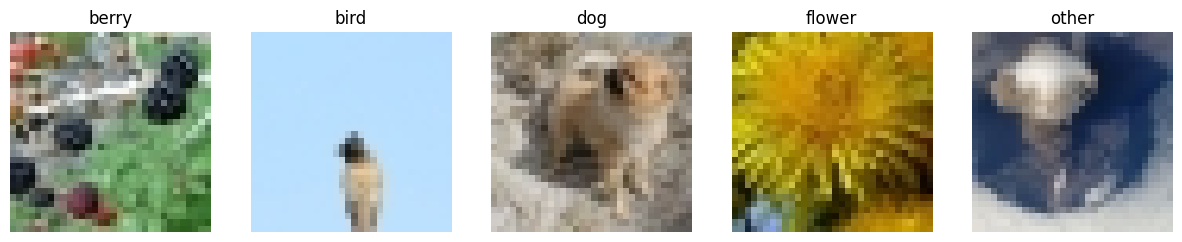

In [140]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# import torchinfo
import torch

# Setting device so that code can run on GPU if available
device_name = "cpu"
if torch.cuda.is_available():
    device_name = "cuda:0"
elif torch.mps.is_available():
    device_name = "mps"
device = torch.device(device_name)
print(device.type)


# Will apply the following transformations to the images:
#explanations are given at the bottom of this file
# Note we optionaly resize the images to 32x32 pixels in case they are not already that size.
transform = transforms.Compose(
    [transforms.Resize((32, 32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 

# We are Loading training and test datasets.
# Then, we apply the transformations on them. so that they are in the right format.
# ImageFolder automatically assigns labels to images based on folder name.
trainset = torchvision.datasets.ImageFolder(root='./Linnaeus_5_32X32/train', transform=transform)
testset = torchvision.datasets.ImageFolder(root='./Linnaeus_5_32X32/test', transform=transform)


# we will split the testset into validation and test sets.
# 50/50 split and randomly split. In general, this should be fine, but for small datasets, there is
# a chance that the split may have unbalanced classes.
val_size = int(0.5 * len(testset))
test_size = len(testset) - val_size
valset, testset = torch.utils.data.random_split(testset, [val_size, test_size])



# These dataloaders will help us to load the data in batches and iterate over them efficiently
# We can also choose to shuffle(whcih we do with the training data).
# num_workers means how many subprocesses to use for data loading. We set it to 2 here.
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2) 
valloader = torch.utils.data.DataLoader(valset, batch_size=32, shuffle=False, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

classes = trainset.classes # this is how we get the class names

# creating subplots to show some sample images from each class
fig, axes = plt.subplots(1, len(classes), figsize=(15, 5))
for i, class_name in enumerate(classes):

    # we use class_idx because the labels are stored as indices so we convert class name to index
    class_idx = trainset.class_to_idx[class_name]
    for img, label in trainset:
        if label == class_idx:
            img = img / 2 + 0.5  # unnormalize
            npimg = img.numpy()
            
            axes[i].imshow(np.transpose(npimg, (1, 2, 0)))
            axes[i].set_title(class_name)
            axes[i].axis('off')
            break
plt.show()

# The lines below combine transformations of turning an image into a
# pytorch tensor and normalising the tensor to have mean 0.5 and standard deviation 0.5 for each colour channel
#  (Red, Green, Blue).
# This is useful to do before feeding the images into a neural network 
# becaause it imrpoves model convergence and helps iwth stability (i.e. no large gradient updates)
# transform = transforms . Compose (
#  [ transforms . ToTensor () ,
#  transforms . Normalize ((0.5 , 0.5 , 0.5) , (0.5 , 0.5 , 0.5) ) ])

### Question 2

In [141]:
class myCNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Define layers here

        # kernel size 3 means we are using 3x3 filters
        # padding 1 means we are adding 1 pixel of padding around the input image
        # out put channels is 64 means we are using 16 filters
        # each pixel will contribute to 16 different feature maps

        # first conv layers: it has 3 input channels (RGB), 64 output channels, kernel size 3, padding 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, 3)
        # self.conv4 = nn.Conv2d(256, 256, 3)
        
        # max pooling layer: kernel size 2, stride 2 (we are reducing the image size by half) 
        # also helps to reduce overfitting as it introduces generalisation
        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)


        # fully connected layers we push our flattened image through a regular neural network 
        self.fc1 = nn.Linear(256*6*6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, len(classes))

    def forward(self, x):

        # conv then ReLU then maxpool
        x = self.maxpool(F.relu(self.conv1(x)))
        x = self.maxpool(F.relu(self.conv2(x)))
        x = (F.relu(self.conv3(x)))
        # x = (F.relu(self.conv4(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# I have tried 4 conv layers 2 linears, 4 conv layers 3 linears, 3 conv layers 2 linears
# and found this generalises the best for this dataset.

### Question 3

In [142]:
import torchsummary

# Create the network and move it to the device (GPU or CPU)
net = myCNN()
net = net.to(device)

torchsummary.summary(net, (3, 32, 32))  # Batch size of 32, 3 color channels, 32x32 images   
# This lets us see which order the layers are executed and the output shape of each layer. We can also see the 
# total number of learnable parameters in the model

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
         MaxPool2d-2           [-1, 64, 16, 16]               0
            Conv2d-3          [-1, 128, 16, 16]          73,856
         MaxPool2d-4            [-1, 128, 8, 8]               0
            Conv2d-5            [-1, 256, 6, 6]         295,168
            Linear-6                  [-1, 120]       1,106,040
            Linear-7                   [-1, 84]          10,164
            Linear-8                    [-1, 5]             425
Total params: 1,487,445
Trainable params: 1,487,445
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 1.01
Params size (MB): 5.67
Estimated Total Size (MB): 6.70
----------------------------------------------------------------


### Question 4

In [143]:
# I have slightly deviated from what the question says. I have implemented 2 things

# 1. Validation set to monitor validation loss and accuracy.
# Dependent on this, we can save the best model at that point in time

# 2. Early stopping if validation loss isn't improving. We allow 8 epocs with no improvement before stopping training 
# This allows us to prevent overfitting to the training data and get better generalisation on test data

BEST_MODEL_WEIGHTS = None # to store the best model weights so that we can load it again later on

def train(net, optimiser, criterion, trainloader, valloader, nr_epochs=30):
    losses = [] # store the losses
    best_val_loss = float('inf') # so we track the best validation loss and can compare the model
    epochs_no_improve = 0 # counter for early stopping
    global BEST_MODEL_WEIGHTS
    for epoch in range(nr_epochs):  
        # iterating per epoch
        print(f'Epoch {epoch+1}/{nr_epochs}')

        # going through all the batches in the training set
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients so that we don't accumulate gradients from previous batches
            optimiser.zero_grad()

            # compute the output for all the images in the batch.
            outputs = net(inputs)

            #compute the loss between the outputs and the labels
            loss = criterion(outputs, labels)

            #compute the gradients, i.e. backpropagation
            loss.backward()

            #update the weights 
            optimiser.step()

            #statistics to print later
            losses.append(loss.item())

            if i % 10 == 9:    # print every 10 mini-batches
                print(f'  Batch {i+1}, Loss: {np.mean(losses[-10:]):.3f}', end= ' || ')
            
        print('')
        net.eval()  # set the model to evaluation mode
        # we will accumulate validation loss and statistics to calculate accuracy on validation
        val_loss = 0.0
        correct = 0
        total = 0
        # Note: correct and totlal are for calculating accuracy for validation set
        with torch.no_grad():
            for data in valloader:
                # getting the inputs and the classes of the validation set
                inputs, labels = data
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = net(inputs) # running it once in eval mode
                loss = criterion(outputs, labels) # compute the loss
                val_loss += loss.item() # accumulate the validation loss
                _, predicted = torch.max(outputs.data, 1) # get the predicted class
                total += labels.size(0) # total number of labels
                correct += (predicted == labels).sum().item() # number of correct predictions
        val_loss /= len(valloader) # average validation loss
        val_accuracy = 100 * correct / total # validation accuracy
        print(f'  Validation Loss: {val_loss:.3f}, Validation Accuracy: {val_accuracy:.2f}%')

        if val_loss < best_val_loss: # if validation loss improved
            best_val_loss = val_loss
            epochs_no_improve = 0
            
            #saving the best model weights so we can load them later
            print("  \n Saving best model weights", end='\n')
            BEST_MODEL_WEIGHTS = net.state_dict() 
            
        else:
            epochs_no_improve += 1 # incrementing the counter if no improvement
        if epochs_no_improve >= 8:
            print("Early stopping due to no growth in validation improvement")
            break

        net.train()  # set the model back to training
    print('Finished Training')
if BEST_MODEL_WEIGHTS is not None:
    net.load_state_dict(BEST_MODEL_WEIGHTS) # loading the best model weights saved during training

### Question 5

In [144]:
net = net.to(device) # making sure the model is on the right device
# train(net, 
#       optim.SGD(net.parameters(), lr=0.01,
#                  momentum=0.9), nn.CrossEntropyLoss(),
#                    trainloader, valloader,
#                      nr_epochs=30)

train(net,
      optim.Adam(net.parameters(), lr=0.0001), nn.CrossEntropyLoss(),
        trainloader, valloader,
          nr_epochs=30) 


# some decisions made intially: we used Adam optimiser with learning rate 0.01, as our criterion.
# From the lecture notes, we know that Adam uses an adaptive learning rate that combines AdaGrad and RMSProp.
# Using the first and second moments of the gradients to change the learning rate
# Benefits of Adam: Faster convergence, good for complex models
# However, it is very easy to overfit with Adam because of its fast learning rate nad we also have less control over when wanting to change the learning rate.

# I noticed that Adam seems to constantly get stuck in a local minimum after some epochs with learning rate 0.01,
# Hence, I decided to try Adam with a lower learning rate of 0.0001. This seemed to help and allowed us to see
# gradual improvement in validation loss


# One might consider SGD because of its improved generalisation, but it is slower to converge.
# we used CrossEntropyLoss which is suitable for multi-class classification problems like ours. and ran for 30 epochs

Epoch 1/30
  Batch 10, Loss: 1.608 ||   Batch 20, Loss: 1.610 ||   Batch 30, Loss: 1.595 ||   Batch 40, Loss: 1.586 ||   Batch 50, Loss: 1.565 ||   Batch 60, Loss: 1.565 ||   Batch 70, Loss: 1.513 ||   Batch 80, Loss: 1.510 ||   Batch 90, Loss: 1.469 ||   Batch 100, Loss: 1.464 ||   Batch 110, Loss: 1.461 ||   Batch 120, Loss: 1.444 ||   Batch 130, Loss: 1.413 ||   Batch 140, Loss: 1.461 ||   Batch 150, Loss: 1.366 ||   Batch 160, Loss: 1.386 ||   Batch 170, Loss: 1.354 ||   Batch 180, Loss: 1.367 || 
  Validation Loss: 1.329, Validation Accuracy: 43.80%
  
 Saving best model weights
Epoch 2/30
  Batch 10, Loss: 1.338 ||   Batch 20, Loss: 1.332 ||   Batch 30, Loss: 1.295 ||   Batch 40, Loss: 1.367 ||   Batch 50, Loss: 1.311 ||   Batch 60, Loss: 1.267 ||   Batch 70, Loss: 1.265 ||   Batch 80, Loss: 1.298 ||   Batch 90, Loss: 1.264 ||   Batch 100, Loss: 1.223 ||   Batch 110, Loss: 1.324 ||   Batch 120, Loss: 1.265 ||   Batch 130, Loss: 1.197 ||   Batch 140, Loss: 1.223 ||   Batch 150, Lo

### Question 6

In [145]:
def accuracy(model, testloader):
    # Accuracy is (number of correct predictions) / (total number of predictions) * 100
    correct = 0
    total = 0

    # we want a map from class index to class name for printing later
    class_idxes = {}
    for _, class_name in enumerate(classes):
        class_idxes[trainset.class_to_idx[class_name]] = class_name

    # we first set the correct and total counts for each class to 0
    class_correct = list(0. for i in range(len(classes)))
    class_total = list(0. for i in range(len(classes)))
    with torch.no_grad():  # Disable gradient calculation
        for data in testloader:
            # Get the inputs; data is a list of [inputs, labels]
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            
            # Compute the outputs by passing the inputs to the model
            outputs = model(images)
            
            # Get the class with the highest 'energy' (prediction)
            _, predicted = torch.max(outputs.data, 1)
            
            # Update total and correct predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            # Update correct and total counts for each class
            for i in range(labels.size(0)):  # Iterate over each image in the batch
                label = labels[i]
                class_total[label] += 1
                class_correct[label] += (predicted[i] == label).item()
    accuracy = 100 * correct / total
    for i in range(len(classes)):
        if class_total[i] > 0:
            class_accuracy = 100 * class_correct[i] / class_total[i]
            print(f'Accuracy for class {class_idxes[i]}: {class_accuracy:.2f}%')
    print(f'Overall Accuracy: {accuracy:.2f}%')

accuracy(net, testloader)


# I decided to try Adam with a lower learning rate of 0.0001 instead of SGD with momentum
# -------------------------
# Adam lr=0.0001: 3 conv layers and 3 fully connected layers, max pooling after first 2 conv layers
# -------------------------
# Accuracy for class berry: 79.79%
# Accuracy for class bird: 55.81%
# Accuracy for class dog: 56.91%
# Accuracy for class flower: 77.25%
# Accuracy for class other: 69.95%
# Overall Accuracy: 67.90%
# -------------------------
# This is my best model yet! It seems that Adam with a lower learning rate is able to generalise better across all classes.
# It seems to be because we are able to have more gradual updates to the weights and avoid excessive overfitting.
# Some classes like bird and other still have lower accuracy, perhaps due to class imbalance or inherent difficulty in distinguishing those classes,
# but overall, this model is performing better than the previous ones.


# Some previous Outputs
# -------------------------
# SGD with momentum: 3 conv layers and 3 fully connected layers, max pooling after first 2 conv layers
# -------------------------
# Accuracy for class berry: 60.78%
# Accuracy for class bird: 60.32%
# Accuracy for class dog: 63.35%
# Accuracy for class flower: 74.65%
# Accuracy for class other: 61.58%
# Overall Accuracy: 64.30%
# -------------------------
# SGD with momentum: 2 conv layers and 3 fully connected layers, max pooling after first 2 conv layers
# -------------------------
# Accuracy for class berry: 68.48%
# Accuracy for class bird: 29.63%
# Accuracy for class dog: 78.39%
# Accuracy for class flower: 60.82%
# Accuracy for class other: 75.36%
# Overall Accuracy: 62.00%
# -------------------------

# Theses two CNN have very interesting results. While the first CNN was able to generalise better across all classes,
# the second CNN had very high accuracy for some classes (dog, other) but very low for others (bird).
# This shows that the second CNN is overfitting to certain classes while neglecting others.
# This could be due to the fact that the second CNN has less capacity to detect complex features.
# or because of the randomness in the splitting of the test and validation set. For this reason i chose 3 conv layers




Accuracy for class berry: 68.25%
Accuracy for class bird: 40.19%
Accuracy for class dog: 71.86%
Accuracy for class flower: 81.82%
Accuracy for class other: 64.50%
Overall Accuracy: 64.90%


***

### Part 2: Fine tuning

### Question 1

In [146]:
import os
import shutil

folder_name = 'Linnaeus_5_32X32'
new_folder_name = 'Linnaeus_5_32X32_small'

# if it already exists, remove it
if os.path.exists(new_folder_name):
    shutil.rmtree(new_folder_name)

#copy all the contents 
shutil.copytree(folder_name, new_folder_name)
for subfolder in ['train', 'test']:
    subfolder_path = os.path.join(new_folder_name, subfolder)
    for class_folder in os.listdir(subfolder_path):
        class_folder_path = os.path.join(subfolder_path, class_folder)
        images = os.listdir(class_folder_path)

        # keep only bird or dog subfolders
        if class_folder not in ['bird','dog']:
            shutil.rmtree(class_folder_path)

print("Filtered dataset created.")

# Now we will create dataloaders for the small dataset
trainset_small = torchvision.datasets.ImageFolder(root='./Linnaeus_5_32X32_small/train', transform=transform)
testset_small = torchvision.datasets.ImageFolder(root='./Linnaeus_5_32X32_small/test', transform=transform)
# These dataloaders will help us to load the data in batches and iterate over them efficiently
# We can also choose to shuffle(which we do with the training data).
trainloader_small = torch.utils.data.DataLoader(trainset_small, batch_size=64, shuffle=True)
testloader_small = torch.utils.data.DataLoader(testset_small, batch_size=64, shuffle=False)
print("Data Loaders created")

Filtered dataset created.
Data Loaders created


### Question 2

In [147]:
net = myCNN()
net.load_state_dict(BEST_MODEL_WEIGHTS)  # load the weights from previous best model
net = net.to(device)

def partial_forwardCNN(x):
    # We are running through our CNN up to the flattening layer
    x = net.maxpool(F.relu(net.conv1(x)))
    x = net.maxpool(F.relu(net.conv2(x)))
    x = (F.relu(net.conv3(x)))
    # x = (F.relu(net.conv4(x)))
    x = torch.flatten(x, 1) # flatten all dimensions except batch
    return x


class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        # The input dimensions match the flattened dimensions from the CNN
        self.fc1 = nn.Linear(256*6*6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,2)
        # Since we now only have two classes (bird and dog), the output layer has 2 neurons.

        # Using LogSoftmax for output layer to get log-probabilities because we will use NLLLoss as criterion.
        self.logsoftmax = nn.LogSoftmax(dim=1)

        
    def forward(self, x):
        # fully connected linear layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        # output layers
        x = self.fc3(x)
        x = self.logsoftmax(x)
        return x

In [148]:
mlp = MLP()
mlp = mlp.to(device)
torchsummary.summary(mlp, input_size=(32, 256*6*6))  # Input size matches the flattened output from CNN

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1              [-1, 32, 120]       1,106,040
            Linear-2               [-1, 32, 84]          10,164
            Linear-3                [-1, 32, 2]             170
        LogSoftmax-4                [-1, 32, 2]               0
Total params: 1,116,374
Trainable params: 1,116,374
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 1.12
Forward/backward pass size (MB): 0.05
Params size (MB): 4.26
Estimated Total Size (MB): 5.43
----------------------------------------------------------------


### Question 3

In [149]:
def fine_tune(CNN, MLP, optimizer, criterion, trainloader, nr_epochs=30):

    CNN.eval()  # set CNN to evaluation mode
    for epoch in range(nr_epochs):
        MLP.train()  # set MLP to training mode
        print(f'Epoch {epoch+1}/{nr_epochs}')
        cur_loss = 0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward pass through CNN and MLP
            with torch.no_grad():  #clear gradients
                cnn_output = partial_forwardCNN(inputs)
            outputs = MLP(cnn_output)

            # compute loss
            loss = criterion(outputs, labels)

            # backward pass and optimization
            loss.backward()

            #backpropogate through mlp only and update weights
            optimizer.step()

            # statistics to print later
            cur_loss += loss.item()
            
            if i % 10 == 9:    # print every 10 mini-batches
                print(f'  Batch {i+1}, Average Loss: {cur_loss / 10:.3f}', end=' || ')
                cur_loss = 0.0    
        print('')
    print('Finished Fine-tuning')

# Here, we only training the MLP and keeping the CNN frozen. This should help us to adapt the model to the new classes
# without overfitting too much.

### Question 4

In [150]:
fine_tune( net, mlp,
            optim.Adam(mlp.parameters(), lr=0.0001),
            nn.NLLLoss(),
            trainloader_small,
)
# We are running fine-tuning for 30 epochs with Adam optimiser and learning rate 0.0001 and used NLLLoss as criterion
# because our MLP outputs log-probabilities.

Epoch 1/30
  Batch 10, Average Loss: 0.659 ||   Batch 20, Average Loss: 0.579 ||   Batch 30, Average Loss: 0.559 || 
Epoch 2/30
  Batch 10, Average Loss: 0.508 ||   Batch 20, Average Loss: 0.516 ||   Batch 30, Average Loss: 0.478 || 
Epoch 3/30
  Batch 10, Average Loss: 0.435 ||   Batch 20, Average Loss: 0.453 ||   Batch 30, Average Loss: 0.446 || 
Epoch 4/30
  Batch 10, Average Loss: 0.440 ||   Batch 20, Average Loss: 0.402 ||   Batch 30, Average Loss: 0.422 || 
Epoch 5/30
  Batch 10, Average Loss: 0.388 ||   Batch 20, Average Loss: 0.412 ||   Batch 30, Average Loss: 0.373 || 
Epoch 6/30
  Batch 10, Average Loss: 0.384 ||   Batch 20, Average Loss: 0.365 ||   Batch 30, Average Loss: 0.373 || 
Epoch 7/30
  Batch 10, Average Loss: 0.364 ||   Batch 20, Average Loss: 0.330 ||   Batch 30, Average Loss: 0.340 || 
Epoch 8/30
  Batch 10, Average Loss: 0.330 ||   Batch 20, Average Loss: 0.333 ||   Batch 30, Average Loss: 0.326 || 
Epoch 9/30
  Batch 10, Average Loss: 0.314 ||   Batch 20, Averag

### Question 5

In [155]:
def accuracy_fine_tuned(CNN, MLP, testloader):
    CNN.eval()  # set CNN to evaluation mode
    MLP.eval()  # set MLP to evaluation mode

    correct = 0
    total = 0

    # we want a map from class index to class name for printing later
    class_idxes = {}
    for _, class_name in enumerate(classes):
        if class_name in ['bird', 'dog']:
            class_idxes[trainset_small.class_to_idx[class_name]] = class_name
        
    # we first set the correct and total counts for each class to 0
    class_correct = list(0. for i in range(len(class_idxes)))
    class_total = list(0. for i in range(len(class_idxes)))
    with torch.no_grad():  # Disable gradient calculation
        for data in testloader:
            # Get the inputs; data is a list of [inputs, labels]
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            
            # forward pass through CNN and MLP
            cnn_output = partial_forwardCNN(images)
            outputs = MLP(cnn_output)
            
            # Get the class with the highest 'energy' (prediction)
            _, predicted = torch.max(outputs.data, 1)
            
            # Update total and correct predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            # Update correct and total counts for each class
            for i in range(labels.size(0)):  # Iterate over each image in the batch
                label = labels[i]

                # gather stats needed to calculate per-class accuracy
                class_total[label] += 1
                class_correct[label] += (predicted[i] == label).item()
    
    # storing overall accuracy
    accuracy = 100 * correct / total

    # going through each class and calculating accuracy
    for i in range(len(class_idxes)):
        if class_total[i] > 0:
            class_accuracy = 100 * class_correct[i] / class_total[i]
            print(f'Accuracy for class {class_idxes[i]}: {class_accuracy:.2f}%')
    print(f'Overall Accuracy: {accuracy:.2f}%')

accuracy_fine_tuned(net, mlp, testloader_small)

Accuracy for class bird: 70.75%
Accuracy for class dog: 81.75%
Overall Accuracy: 76.25%


This is a huge increase in accuracy compared to training solely on the CNN model. We have an even amount of correct classifications showing that there is no bias towards either class.

Previous Results From CNN:
Accuracy for class berry: 79.79%
Accuracy for class bird: 55.81%
Accuracy for class dog: 56.91%
Accuracy for class flower: 77.25%
Accuracy for class other: 69.95%
Overall Accuracy: 67.90%

New Results From MLP Fine Tuning:
Accuracy for class bird: 78.00%
Accuracy for class dog: 77.50%
Overall Accuracy: 77.75%

While the accuracy is much large, the initial problem had a larger number of classes which makes it inherently more difficult. This experiment was especially useful since bird and dog had the lowest accuracies previously and now we are able to identify them much better. However, I'm not entirely convinced that the previous model was doing worse, since it had to classify more classes and it could be useful to do binary classification between all classes or finetune with more classes. This would give a better idea of how how well the model performs in differentiating between classes.

***
### Part 3: Adversarial attacks

### Question 1

In [152]:
# The idea behind MI-FGSM is to generate pertubations on imput images in order to mislead a classifier.
# The parameter epsilon(e) represents the maximum allowed pertubation on an image.
# The algorithm states that an adversarial example x* should satisfy:
# ||x* - x||_infinity <= e  where x is the original input image.
# A larger pertubation can be to more easily detected.
# The aim of this method is to make it so that the Network doesnt classify x* the same as x.
# However this may change based on what your purpose is.

# Steps
# 1. Initialise alpha as e / number of iterations
# 2.  Caculate the gradient of the loss function wrt x*
# This tells us how to change the image in order to increase the loss and mislead the classifier
# 3. update the momentum term, g_t+1 = mu + g_t*normalised_grad
# This helps to stabilise the pertubation updates and avoid local minima
# 4. a new adversarial example is generated as follows:
# x*_t+1 = x*_t + alpha * sign(g_t+1)
# we iterated this process T times and return a final x*=x*_T

### Question 2

In [ ]:

def adversarial(CNN, MLP, image, label, epsilon=0.01):
    mu = 1
    T = 10  # number of iterations
    alpha = epsilon / T
    g_cur = 0
    x_star = image.to(device)
    label = label.to(device)

    for t in range(T):
        x_star.requires_grad = True
        # forward pass through CNN and MLP
        cnn_output = partial_forwardCNN(x_star.unsqueeze(0))
        outputs = MLP(cnn_output)

        # compute loss
        loss = nn.NLLLoss()(outputs, label.unsqueeze(0))

        # compute gradients
        loss.backward()
        grad = x_star.grad.data.squeeze(0)
        # get the gradient of the loss wrt the input image
        grad_abs = grad.abs()  # Absolute value of the gradient
        grad_flat = grad_abs.view(grad.size(0), grad.size(1), -1)  # Flatten the height and width dimensions
        grad_mean = grad_flat.mean(dim=-1, keepdim=True)  # Compute mean over the spatial dimensions

        # Update momentum term
        g_cur = mu * g_cur + grad / grad_mean  # Normalize the gradient

        # update adversarial example
        x_star = x_star + alpha * g_cur.sign()
        
        # clamp to ensure we stay within the epsilon ball
        x_star = x_star.detach()

    # doing a final prediction on the adversarial example
    cnn_out = partial_forwardCNN(x_star.unsqueeze(0))
    out = MLP(cnn_out)

    # getting the predicted class and its probability
    probababilities = torch.exp(out)
    # we use exp because our MLP outputs log-probabilities and we want actual probabilities
    predicted_prob, predicted_class = torch.max(probababilities, 1)
    if predicted_class != label:
        predicted_prob = 1 - predicted_prob

    return x_star, predicted_prob

# In this experiment, we will generate adversarial examples for a single image in the test set
# and see how well our fine-tuned model can identify them as adversarial
# We do this by:
# 1. generating the output for the original image
# 2. Follow the MI-FGSM algorithm to generate a pertubation that potentially misleads the classifier
# 3. We then check if the pertubed image is classified differently from the original image
# if it is we return 1 - the probability of the predicted class for the pertubed image
# if it is not, we return the probability of the predicted class 

### Question 3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.024999976..1.025].


Probability of original class after attack: 0.0016
Successfully found an adversarial example with p < 0.5
Probability of original class after attack: 0.0016


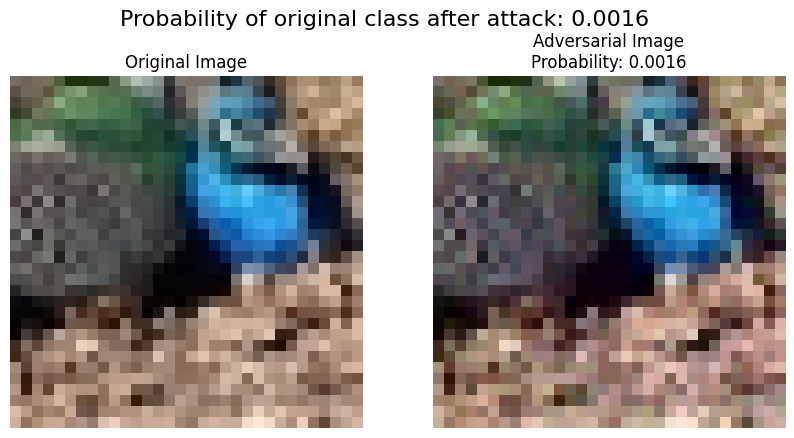

In [ ]:
successful_adv_image = None
successful_original_image = None
successful_label = None
probability_of_original_class = None

for data in testloader_small:
    images, labels = data
    for i in range(images.size(0)):
        image = images[i]
        label = labels[i]
        if testset_small.class_to_idx['bird'] == label:
            adv_image, prob = adversarial(net, mlp, image, label, epsilon=0.05)
            print(f'Probability of original class after attack: {prob.item():.4f}')
            if prob.item() < 0.5:
                # we found a successful attack
                successful_adv_image = adv_image
                successful_original_image = image
                successful_label = label
                probability_of_original_class = prob
                break
    if successful_adv_image is not None:
        break

import matplotlib.pyplot as plt
import numpy as np

# Ensure that successful_adv_image and successful_original_image are found
if successful_adv_image is not None:
    print("Successfully found an adversarial example with p < 0.5")
    print(f'Probability of original class after attack: {probability_of_original_class.item():.4f}')

    # Unnormalize the images for plotting (if needed)
    # Assuming the images were normalized with mean=0.5, std=0.5 during the preprocessing
    successful_adv_image = successful_adv_image / 2 + 0.5
    successful_original_image = successful_original_image / 2 + 0.5

    # Convert from (C, H, W) to (H, W, C) for proper visualization
    np_adv_img = successful_adv_image.detach().cpu().numpy()
    np_orig_img = successful_original_image.detach().cpu().numpy()

    # Plotting both images side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Plot original image
    axes[0].imshow(np.transpose(np_orig_img, (1, 2, 0)))  # Convert from (C, H, W) to (H, W, C)
    axes[0].set_title('Original Image')
    axes[0].axis('off')  # Hide the axes for better visualization

    # Plot adversarial image
    axes[1].imshow(np.transpose(np_adv_img, (1, 2, 0)))  # Convert from (C, H, W) to (H, W, C)
    axes[1].set_title(f'Adversarial Image\nProbability: {probability_of_original_class.item():.4f}')
    axes[1].axis('off')  # Hide the axes for better visualization

    # Add a common title for both images
    plt.suptitle(f'Probability of original class after attack: {probability_of_original_class.item():.4f}', fontsize=16)

    plt.show()

else:
    print("No successful adversarial attack found.")

# In this section, we find an example of a bird image from the test set that was correctly classified by the fine-tuned model
# and generate an adversarial example using the MI-FGSM method with epsilon = 0.05 and display it.
# The steps are as follows:
# 1. Select an image of a bird from a testing set that was correctly classified by the fine-tuned model
# and generate an adversarial example using the function adversarial at ϵ = 0.05, and print
# the probability p from the function.
# 2. Repeat until you find an image that is successfully attacked with p < 0.5 (if you are lucky, the
# first image may be fine).
# 3. Plot the original image, the adversarial image, and the probability that the adversarial image
# is classified as the true label.


### Question 4

In [ ]:
def accuracy_adversarial(CNN, MLP, testloader_small, epsilon):
    CNN.eval()  # set CNN to evaluation mode
    MLP.eval()  # set MLP to evaluation mode

    # to store total number of correctly classified images and total number of attacked images of the correctly classified ones
    total_correct = 0
    total_attacked = 0

    # iterate over the test data
    for data in testloader_small:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        batch_size = images.size(0)
        # geting batch size so we can iterate over each image in the batch
        for i in range(batch_size):
            image = images[i]
            label = labels[i]

            # forward pass through CNN and MLP to check if originally classified correctly
            cnn_output = partial_forwardCNN(image.unsqueeze(0))
            out = MLP(cnn_output)
            # check if originally classified correctly
            if out.argmax(dim=1) == label:
                # only attack if originally classified correctly
                adv_image, prob = adversarial(CNN, MLP, image, label, epsilon)
                total_correct += 1

                # getting attacked means the prob of original class is less than 0.5
                if prob.item() < 0.5:
                    total_attacked += 1

    accuracy = 100 * total_attacked / total_correct
    print(f'Accuracy on adversarial examples with epsilon={epsilon}: {accuracy:.2f}%')

    return total_attacked/total_correct
    
accuracy_adversarial(net, mlp, testloader_small, epsilon=0.05)

# This functions calculates the accuracy of  the fine-tuned model against adversarials.
# we do this by:
# 1. iterate over test set and find correctly classified images
# 2. for each correctly classified image, generate an adversarial example using the adversarial function
# 3. check if the adversarial example is misclassified (i.e. prob of original class < 0.5)
# 4. finally, we calculate the accuracy as (number of attacked images) / (number of correctly classified images)

Accuracy on adversarial examples with epsilon=0.05: 93.44%


0.9344262295081968

### Question 5

The success rate in this experiment refers to the number of images that were correctly classified originally and rejected as their adversarial counterpart. 
<br>Looking at the output of this experiment, we can see that with larger epsilons, the change of correctly classifying an disfigured image decrease. This is expected because with larger epsilons, the perturbations to the image are larger and thus the image is more distorted. We can see that the graph is log-like in shape with a fast drop off in accuracy for small epsilons and then a slower decrease for larger epsilons. 
<br>
We can also see that even with epsilon = 0.04, the model able to reject adversarial images as their own class with close to 90% accuracy. This shows that the model is quite robust to adversarial attacks and is able to identify them correctly unless epsilon is extremely small.

Accuracy on adversarial examples with epsilon=0.02: 57.54%
Accuracy on adversarial examples with epsilon=0.04: 87.21%
Accuracy on adversarial examples with epsilon=0.06: 95.08%
Accuracy on adversarial examples with epsilon=0.08: 98.20%
Accuracy on adversarial examples with epsilon=0.1: 99.51%


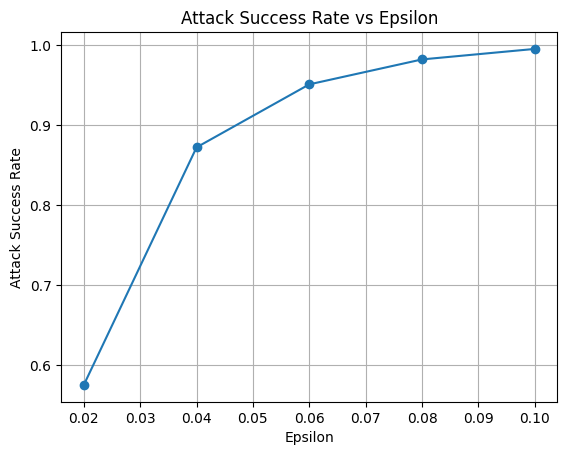

In [164]:
epsilons = [0.02, 0.04, 0.06, 0.08, 0.1]
attack_success_rates = []
for e in epsilons:
    success_rate = accuracy_adversarial(net, mlp, testloader_small, epsilon=e)
    attack_success_rates.append(success_rate)
# Plotting the attack success rate vs epsilon
plt.figure()
plt.plot(epsilons, attack_success_rates, marker='o')
plt.title('Attack Success Rate vs Epsilon')
plt.xlabel('Epsilon')
plt.ylabel('Attack Success Rate')
plt.grid()
plt.show()